# Objetivo del desafio

Conocer los determinantes (las variables) de la variacion en el promedio de deuda en tarjeta de
credito. Por lo tanto, ver que variables afectan a la deuda de credito:

- Balance es la variable dependiente
- Hay que encontrar las variables dependientes

## Que hay que hacer?

Generar modelos econometricos (probados por hipotesis estadisticas) para inspeccionar los efectos.

1. Preparar el ambiente de trabajo (1 puntos). Para ello debes:
- Importe las librerías básicas para el análisis de datos.
- Incluya los import base de statsmodels.
- Importe la base de datos Credit.csv y elimine la columna Unnamed: 0.
- Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto
del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias
para African American, Caucasian y Asian.
Tip: Utilice value_counts() para revisar la cantidad de casos en las variables
categóricas.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('Credit.csv').drop(columns='Unnamed: 0')

In [8]:
print(df['Ethnicity'].value_counts())
print()
print(df['Ethnicity'].value_counts(normalize=True))

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


In [11]:
df = pd.concat([df, pd.get_dummies(df['Ethnicity'], drop_first=True)], axis=1)

2. Generar gráficos descriptivos para las variables continuas (1 puntos):
- Genere una función llamada plot_hist que genere un histograma de la variable e
indique la media y mediana de la misma. Agregue una leyenda para indicar qué
representa cada línea.
- ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?


In [34]:
def plot_hist(df, variable):
    media_variable = df[variable].mean()
    mediana_variable = df[variable].median()

    sns.histplot(data=df, x=variable)
    plt.axvline(media_variable, color='yellow', label='Media')
    plt.axvline(mediana_variable, color='red', label='Mediana')
    plt.legend()



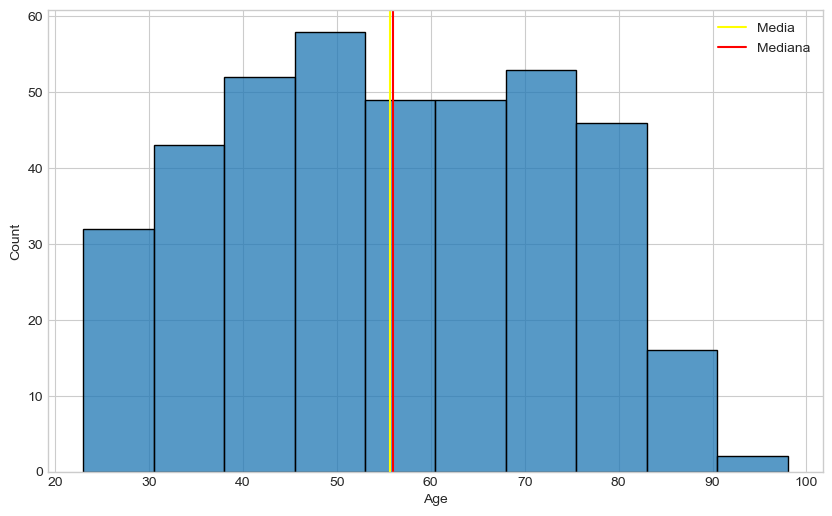

In [35]:
plot_hist(df, 'Age')